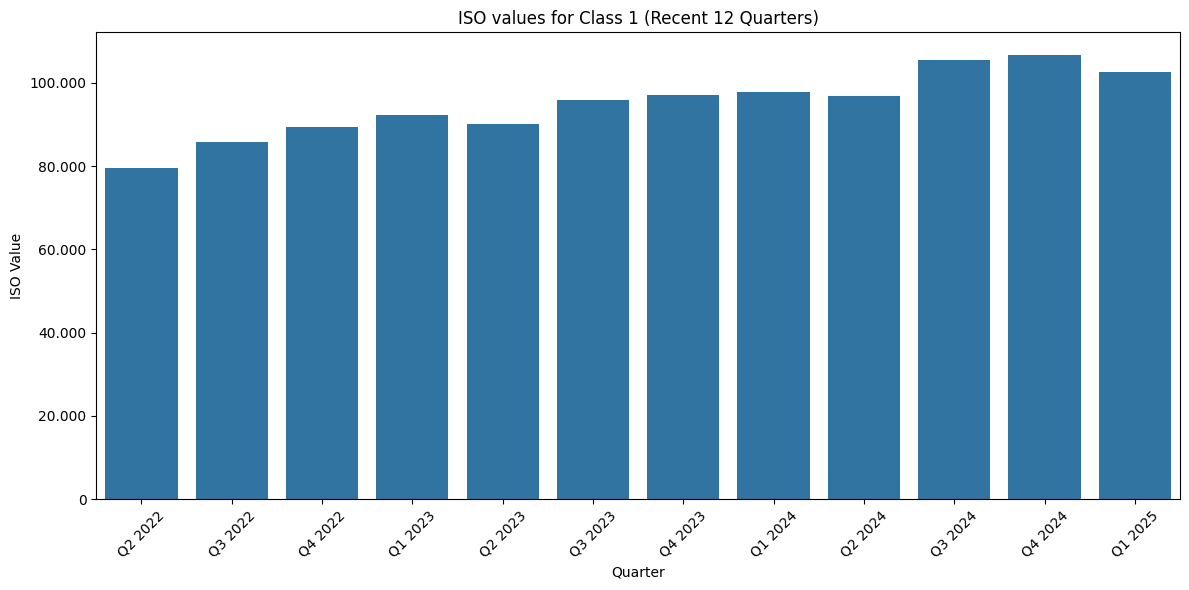

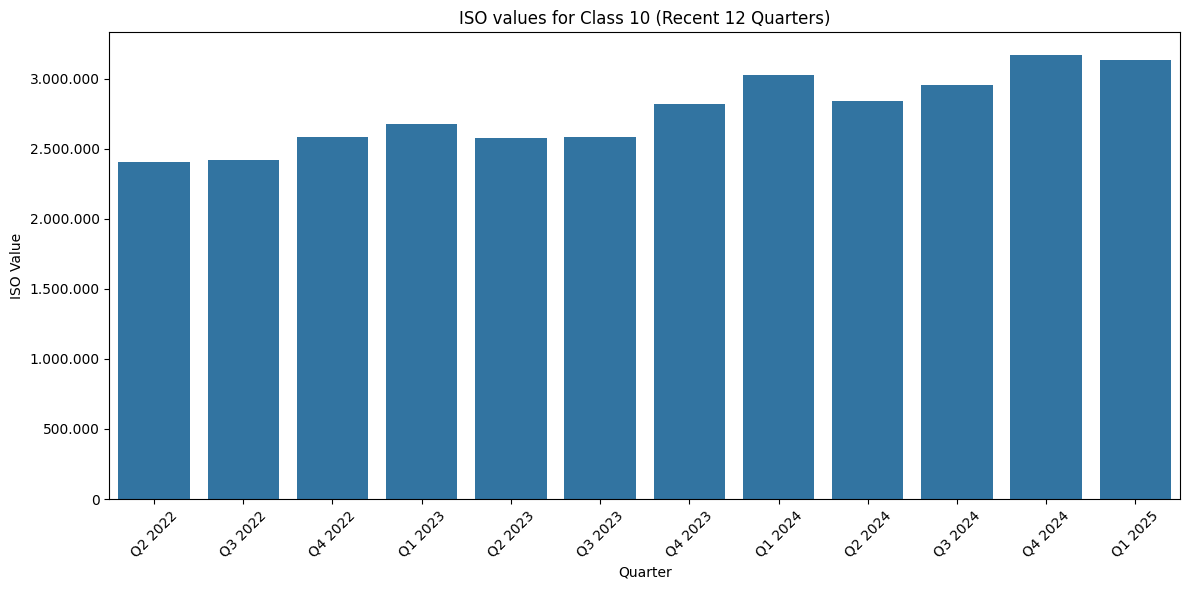

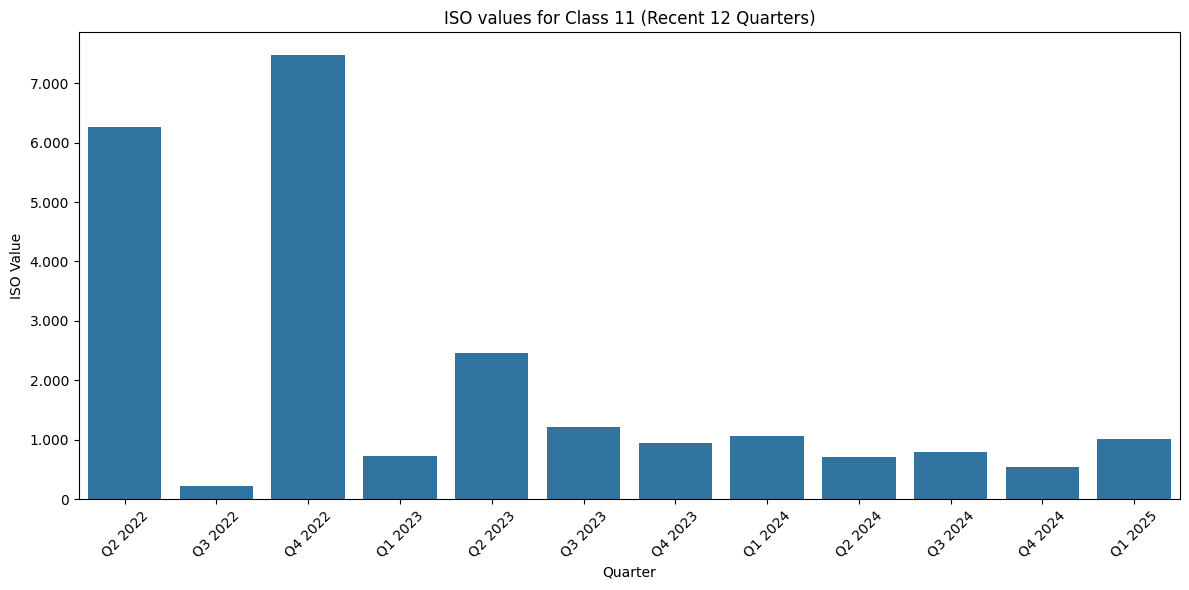

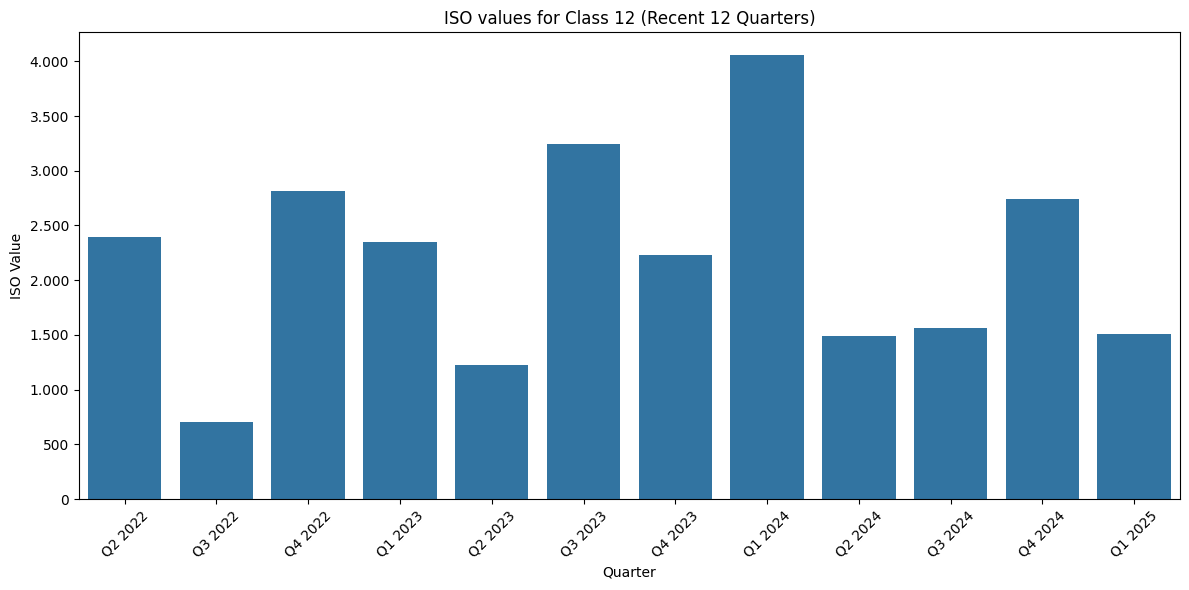

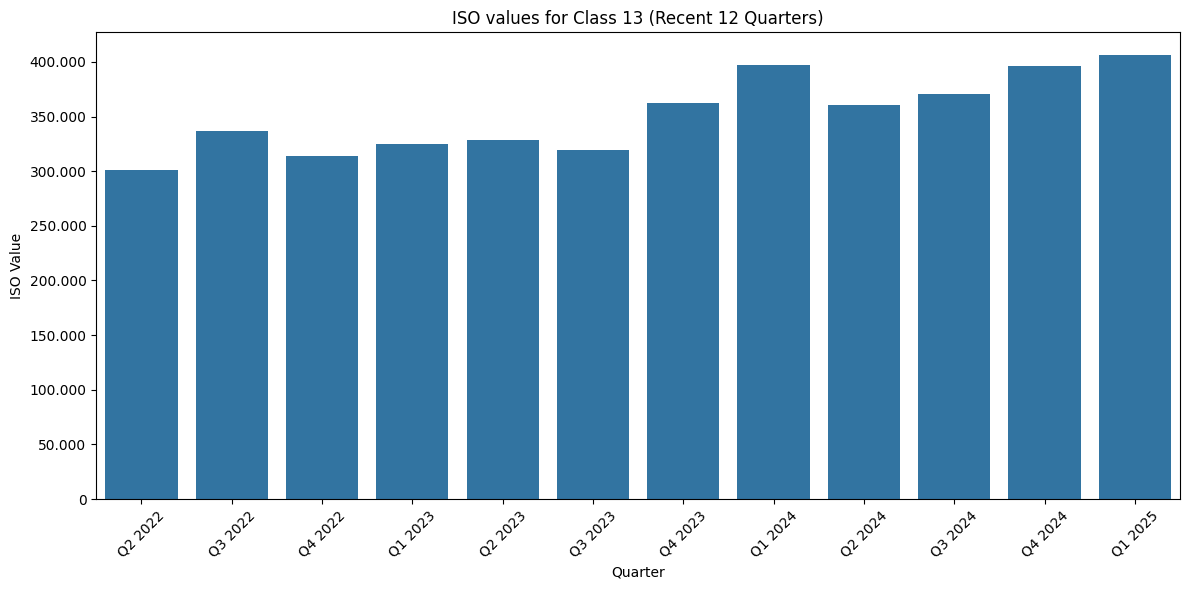

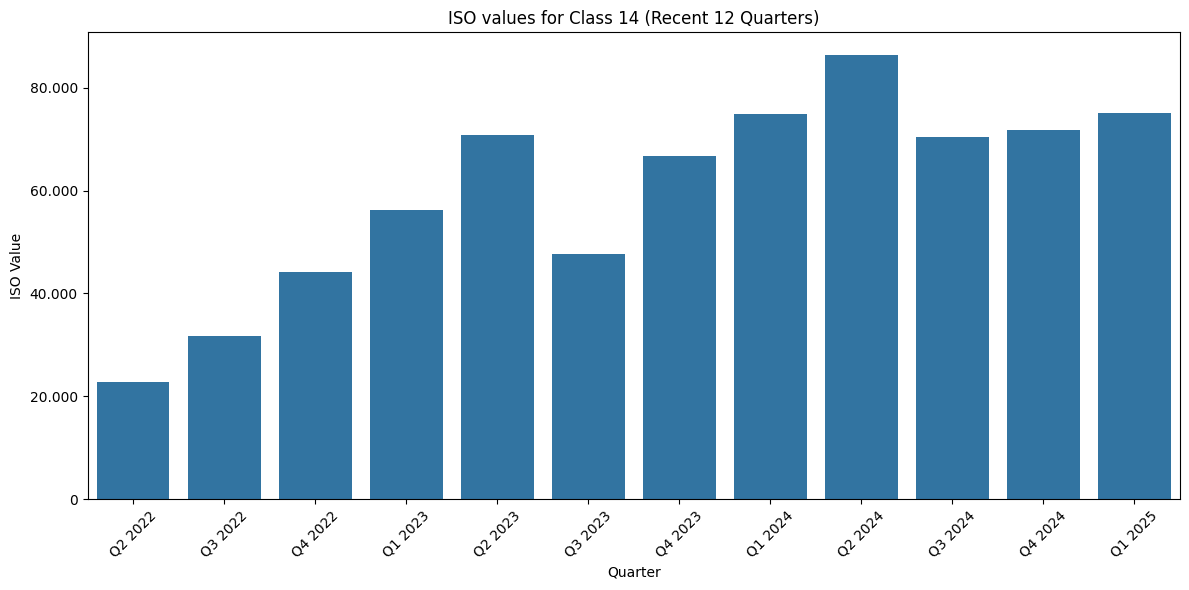

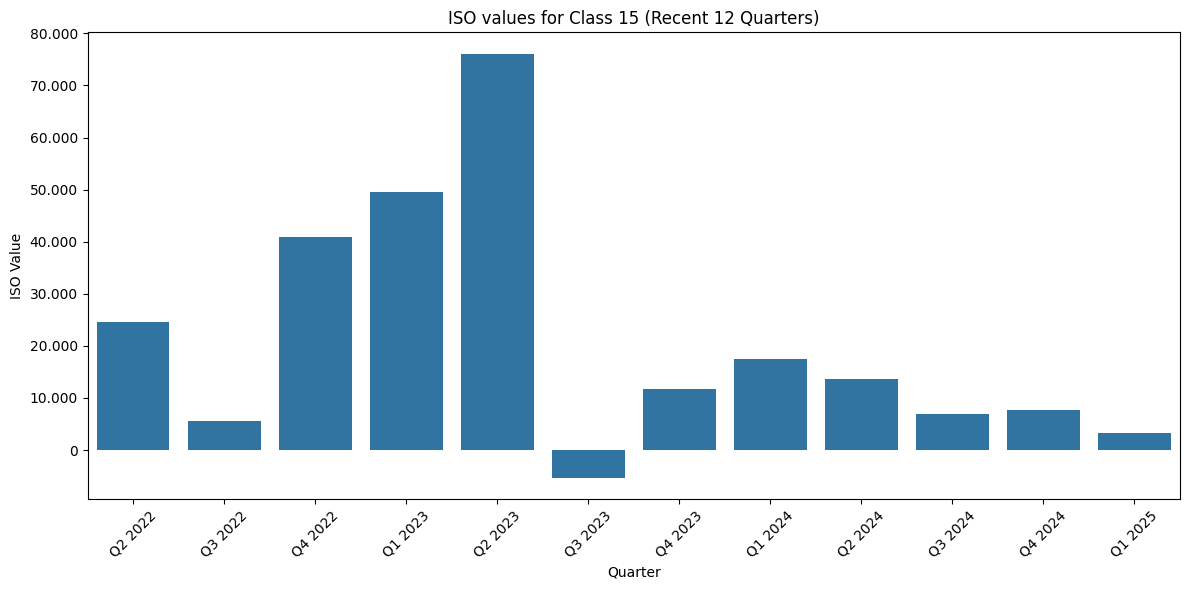

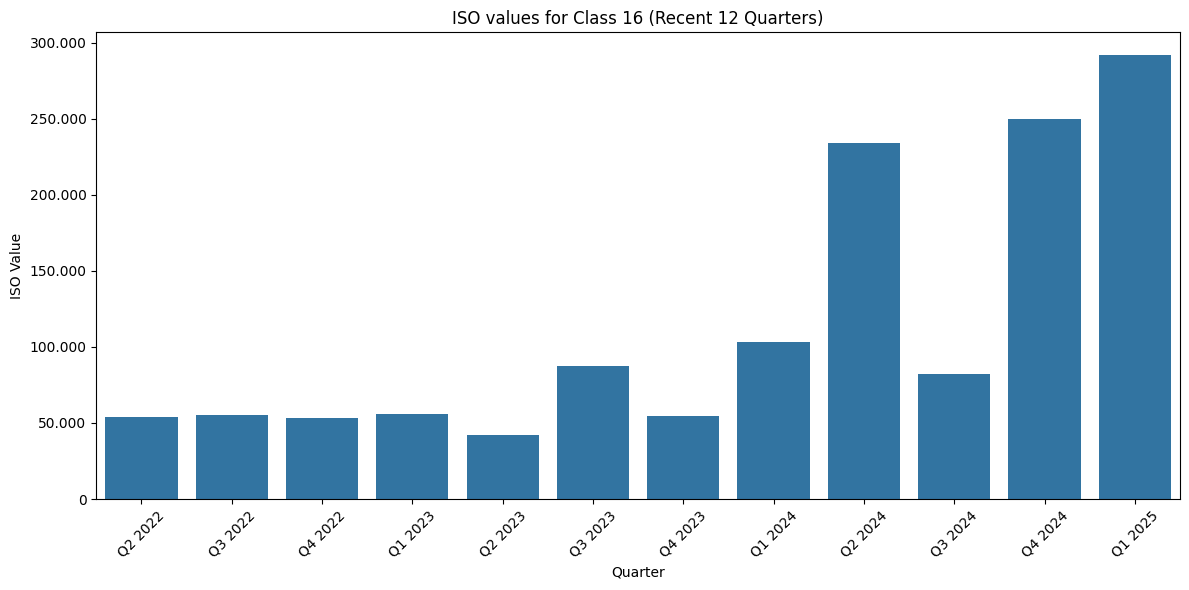

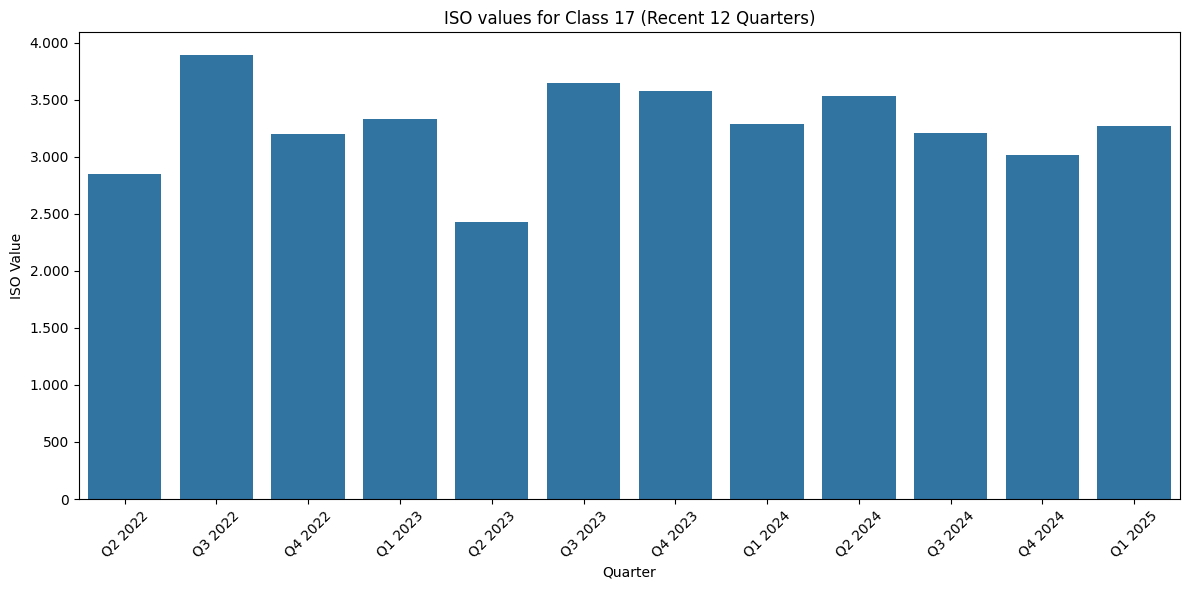

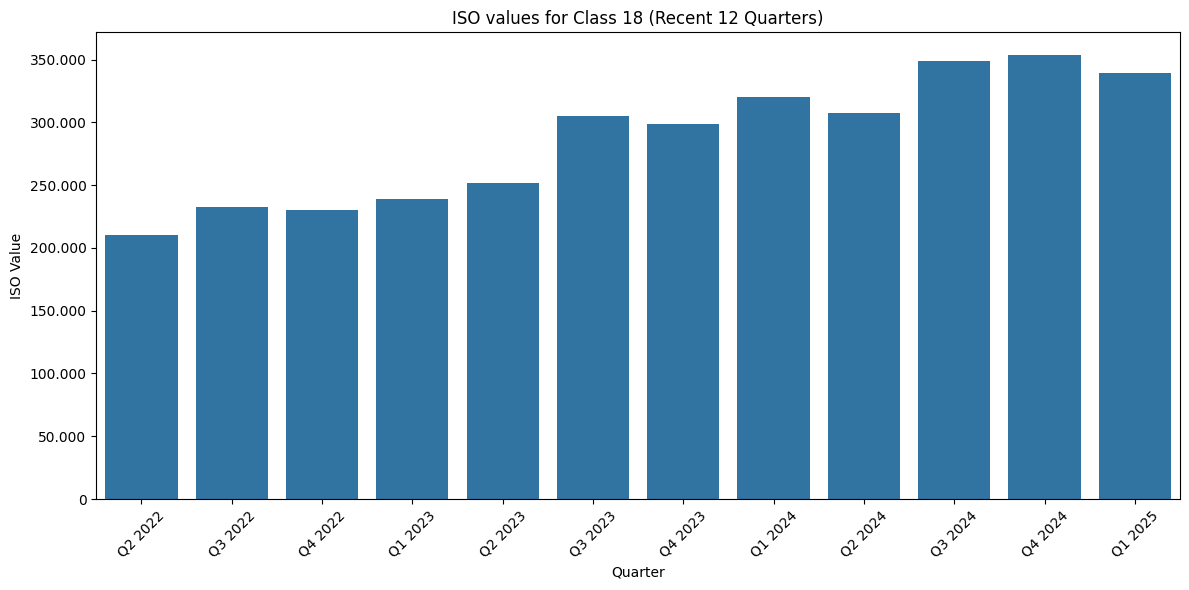

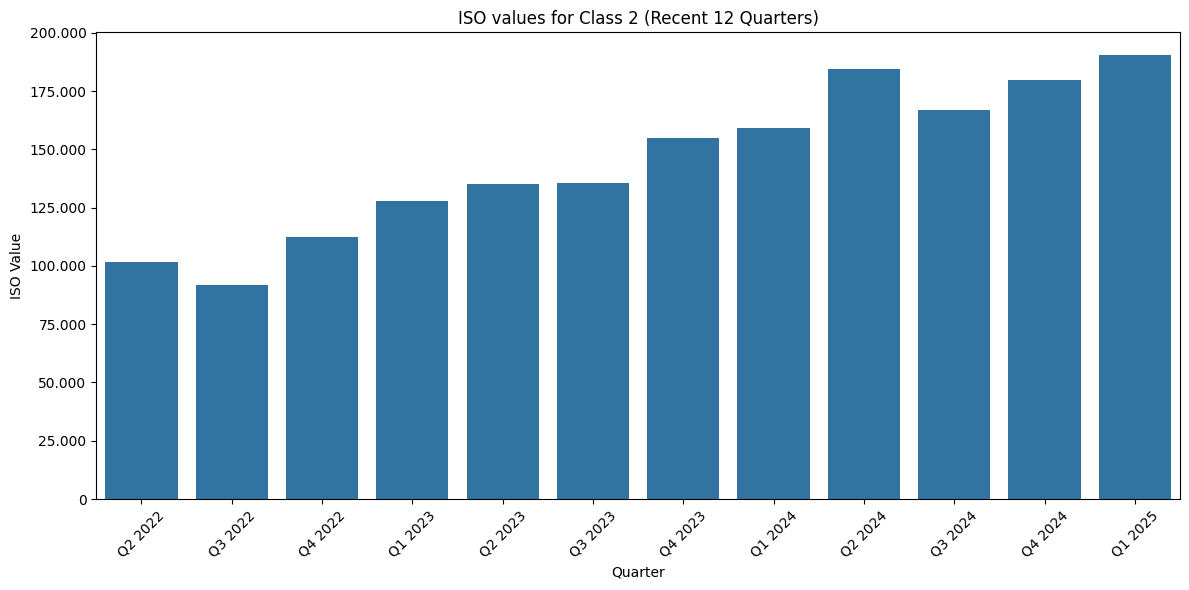

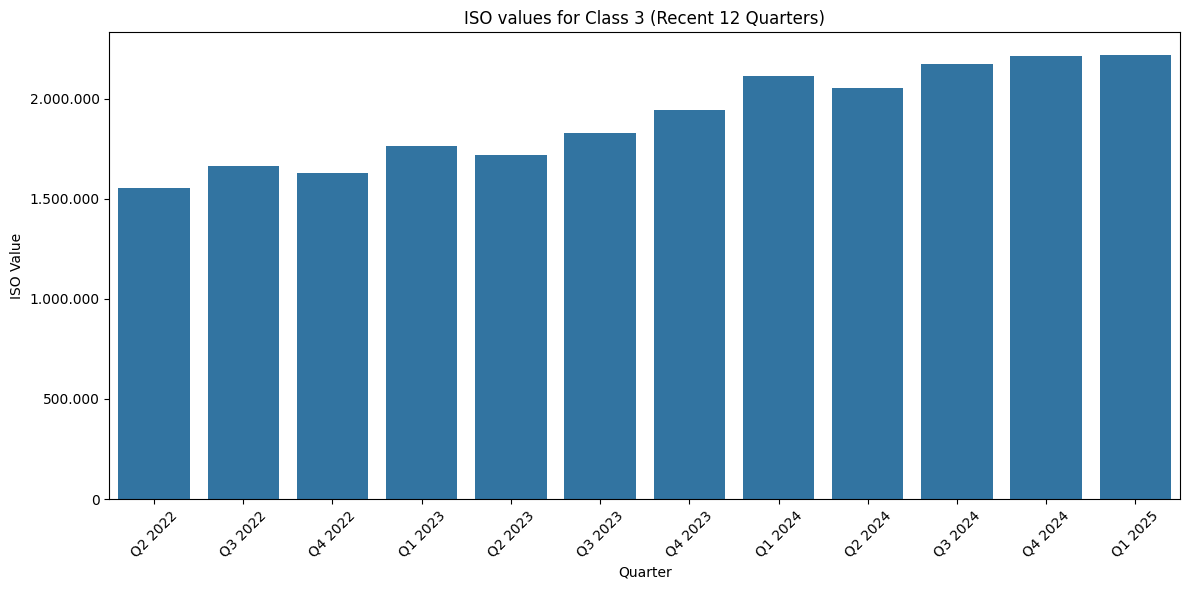

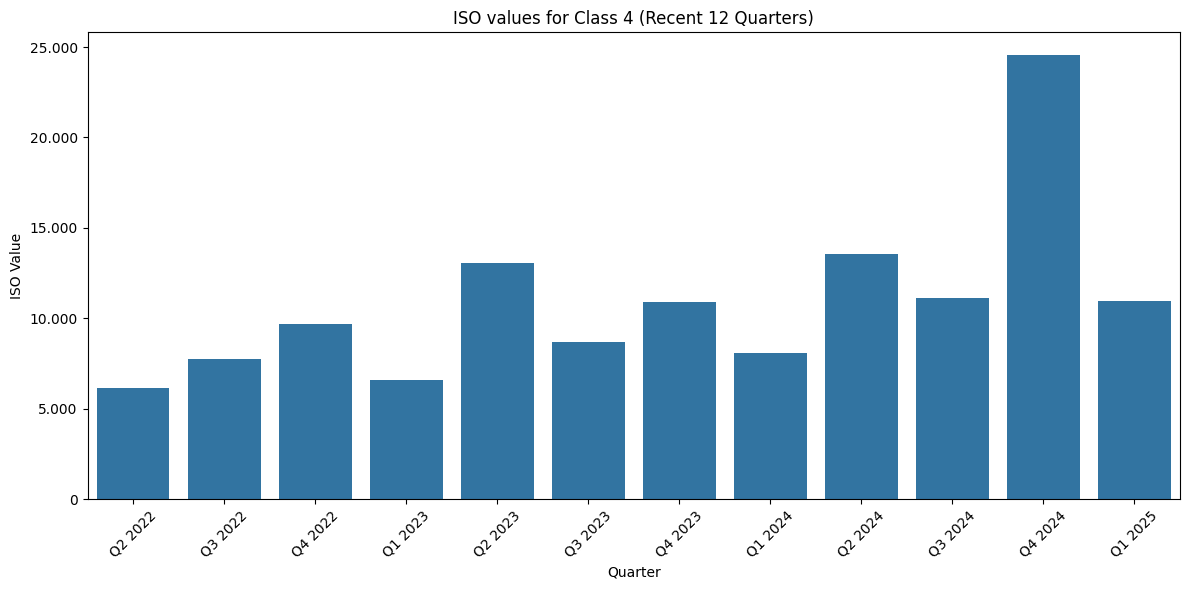

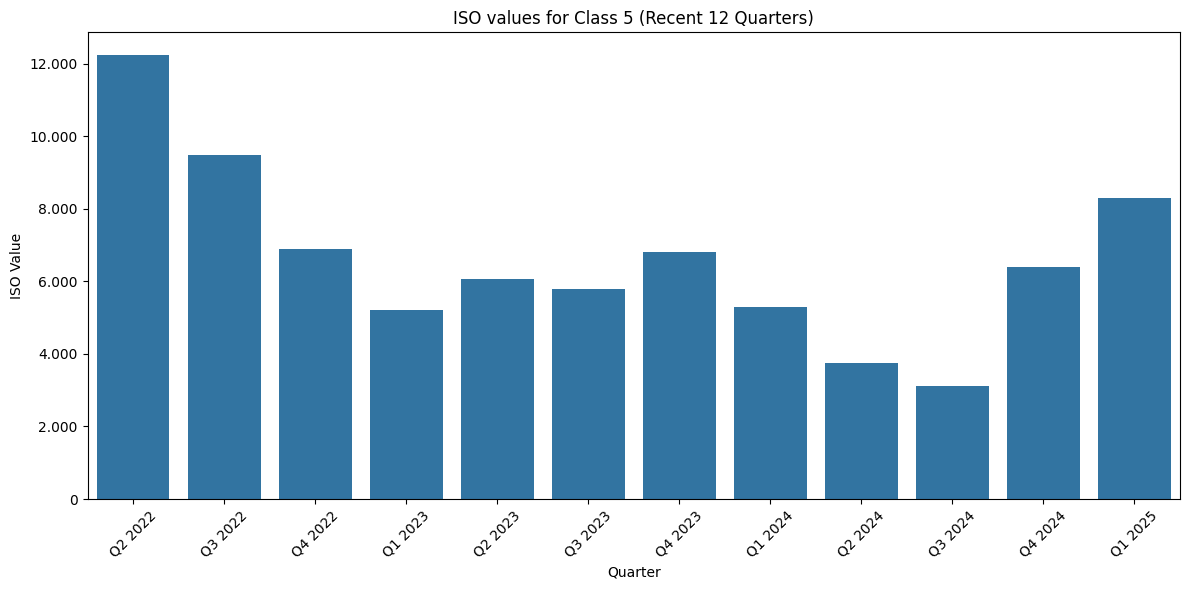

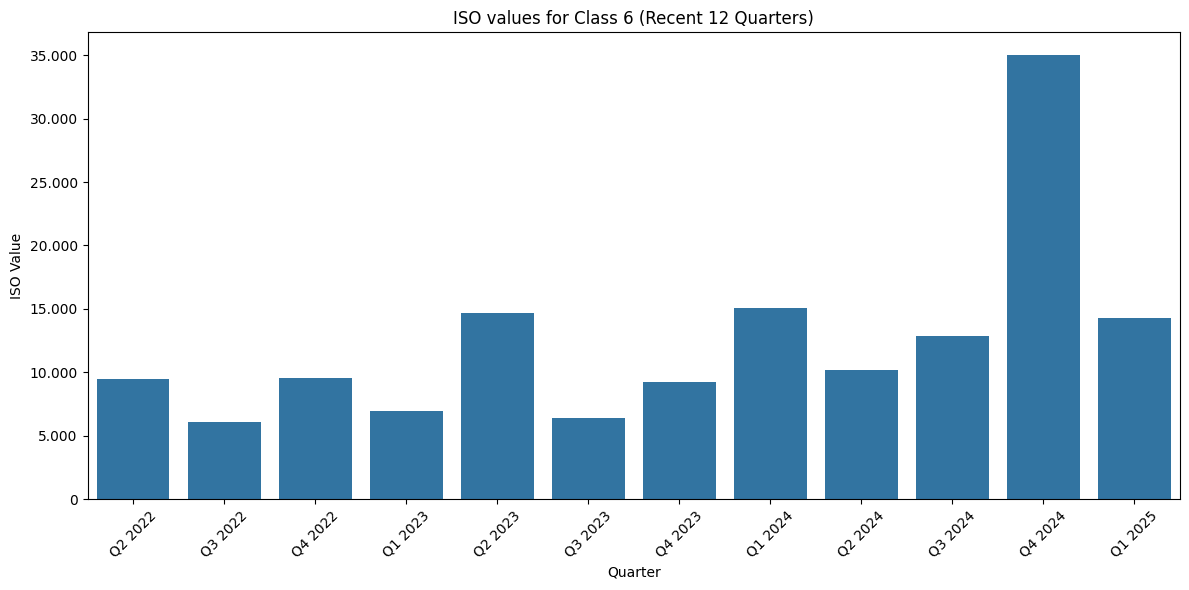

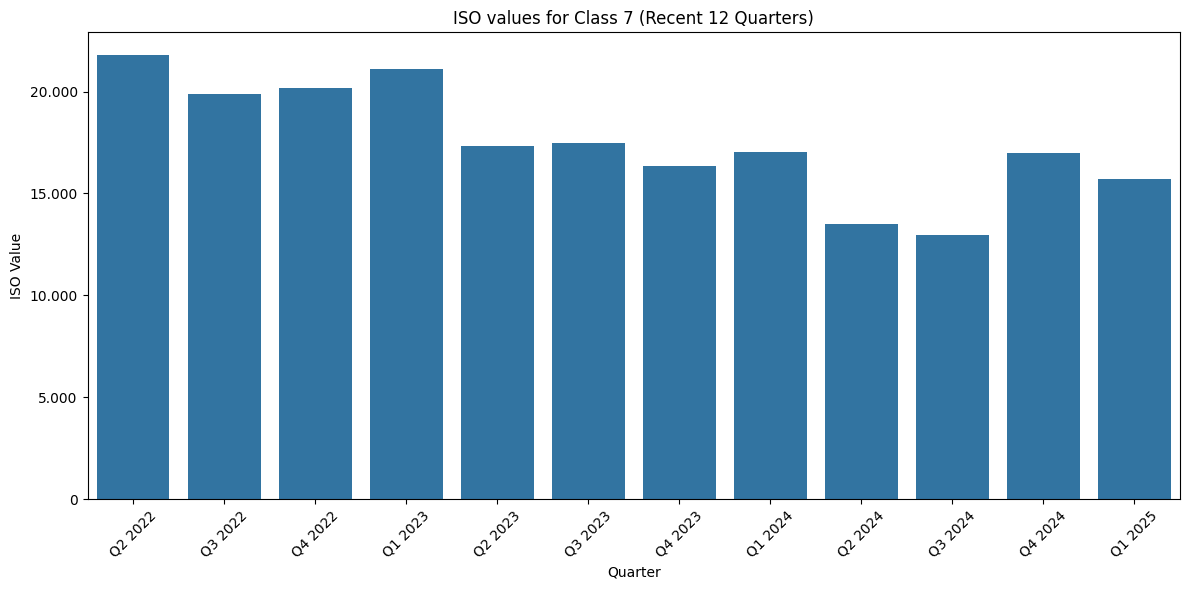

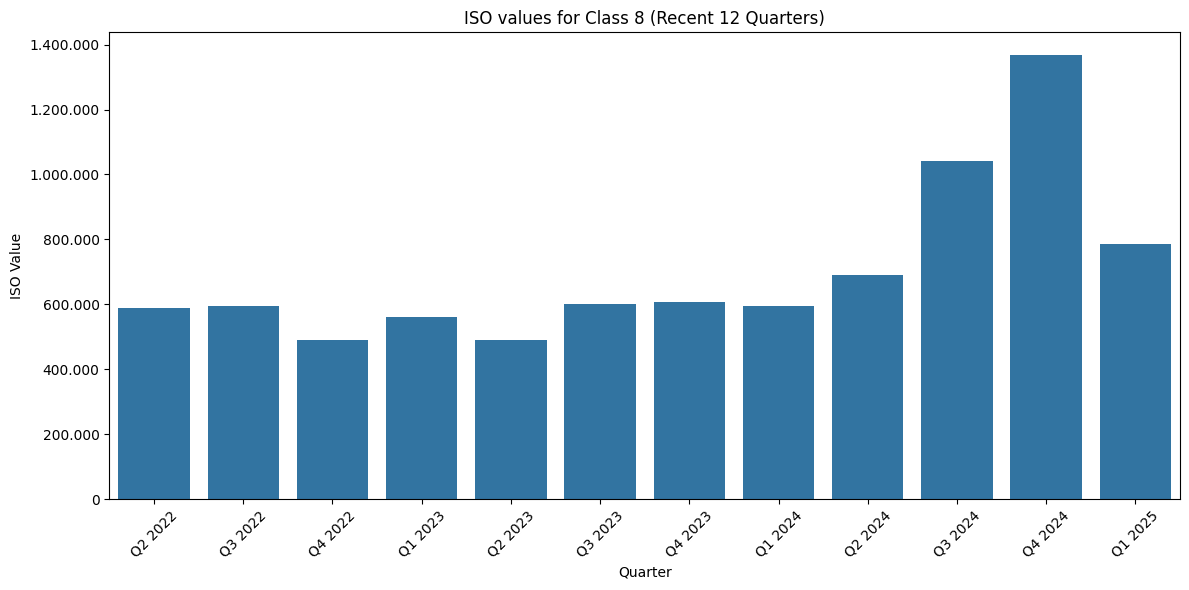

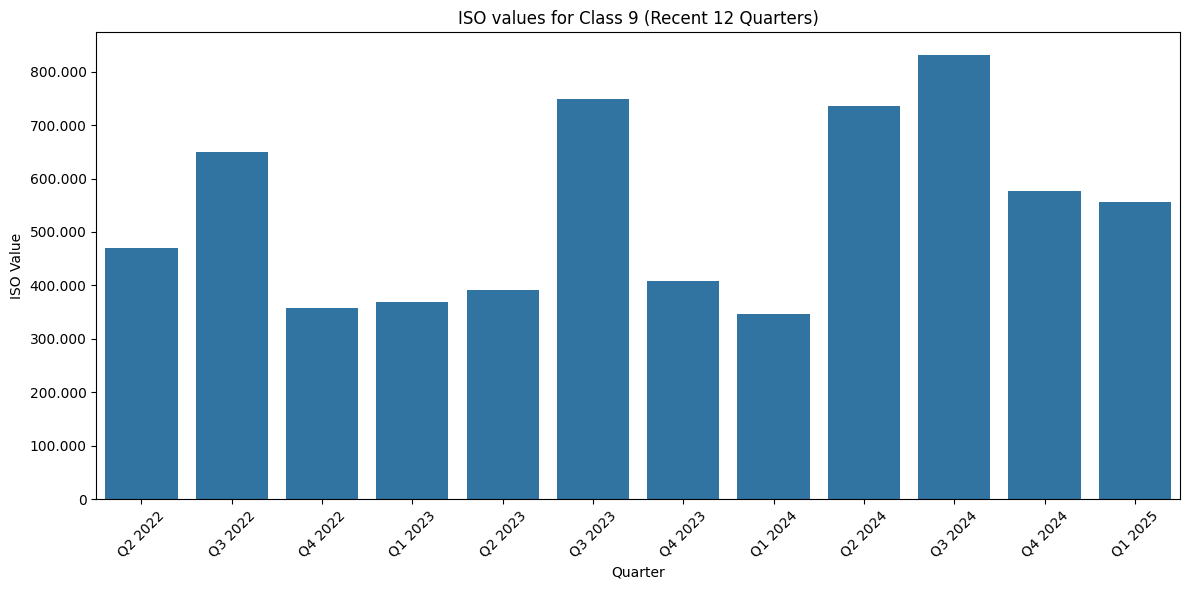

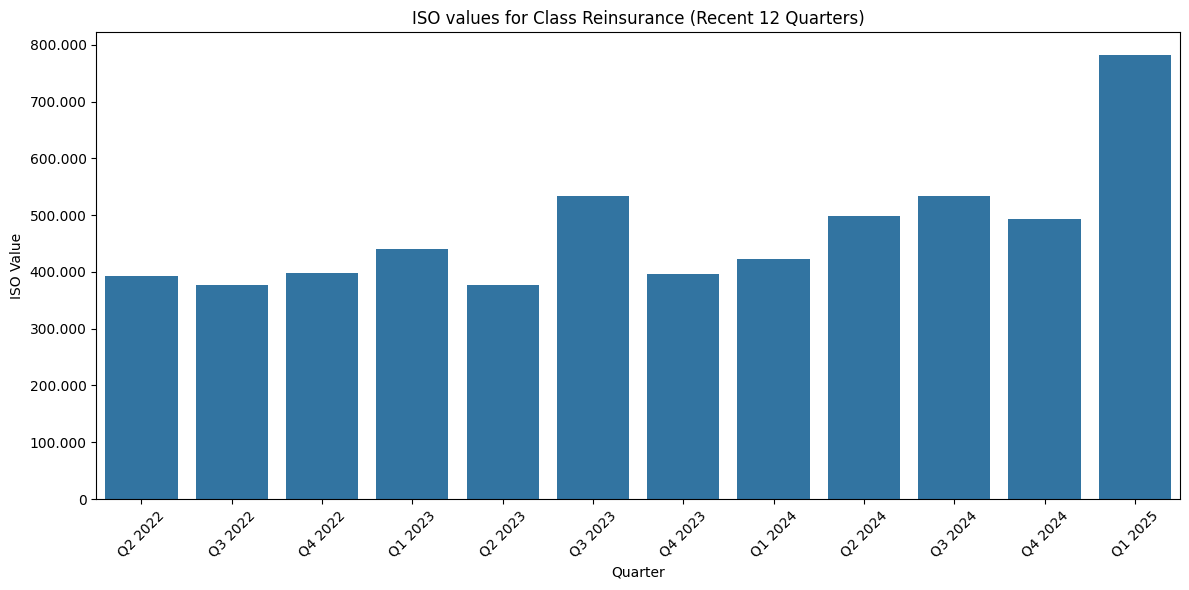

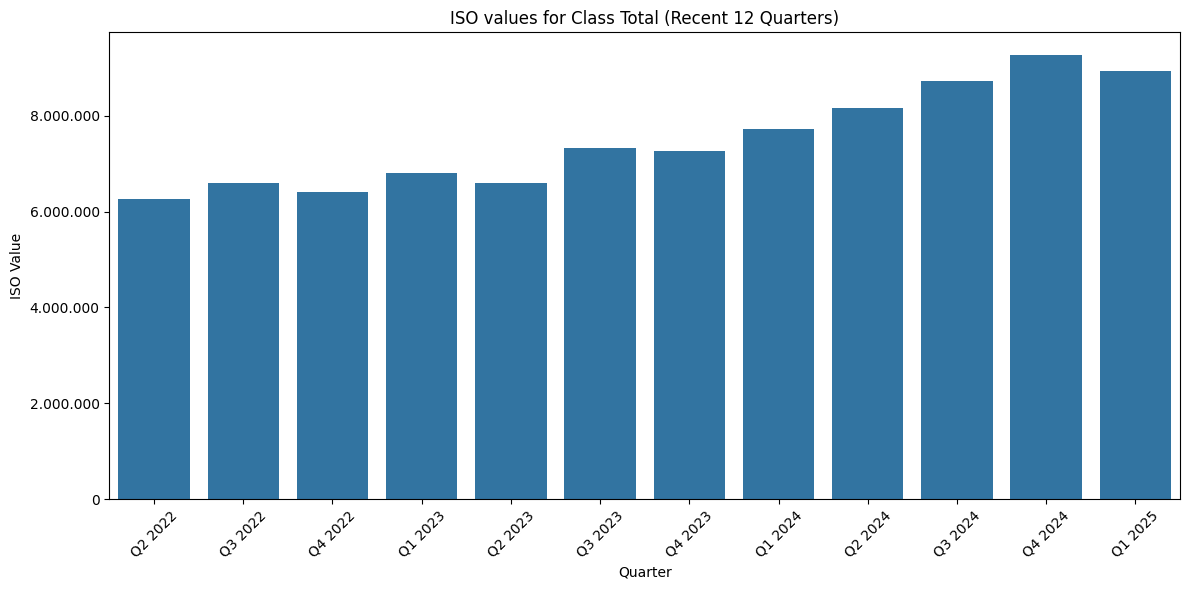

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Load the data
df = pd.read_csv("/home/lukas/development/poland/data/D/interim_combined/combined_claims_isolated.csv", parse_dates=["reporting_date"])

# Sort and create a timeline label
df = df.sort_values(["class_no", "reporting_year", "reporting_quarter"])
df["timeline"] = "Q" + df["reporting_quarter"].astype(str) + " " + df["reporting_year"].astype(str)

# Get the most recent 12 quarters (across all classes)
quarters = df.drop_duplicates(subset=["reporting_year", "reporting_quarter"])
quarters = quarters.sort_values(["reporting_year", "reporting_quarter"], ascending=[False, False]).head(12)
quarters = quarters.sort_values(["reporting_year", "reporting_quarter"])  # chronological order

# Filter the main df to only include these quarters
quarter_tuples = list(zip(quarters["reporting_year"], quarters["reporting_quarter"]))
df_recent = df[df.apply(lambda row: (row["reporting_year"], row["reporting_quarter"]) in quarter_tuples, axis=1)]

# Formatter for thousands separator with dot
formatter = FuncFormatter(lambda x, _: f"{int(x):,}".replace(",", "."))

# Plot a bar chart for each class
for class_no in df_recent["class_no"].unique():
    plt.figure(figsize=(12, 6))
    class_df = df_recent[df_recent["class_no"] == class_no]
    ax = sns.barplot(data=class_df, x="timeline", y="iso")
    ax.yaxis.set_major_formatter(formatter)
    plt.title(f"ISO values for Class {class_no} (Recent 12 Quarters)")
    plt.xlabel("Quarter")
    plt.ylabel("ISO Value")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()